In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.optimize as opt

In [2]:
data = pd.read_csv('ex2data1.txt', header=None)
data.head()

,0,1,2
0,34.623660,78.024693,0
1,30.286711,43.894998,0
2,35.847409,72.902198,0
3,60.182599,86.308552,1
4,79.032736,75.344376,1


In [3]:
x = data.iloc[:,:-1]
y = data.iloc[:, 2]

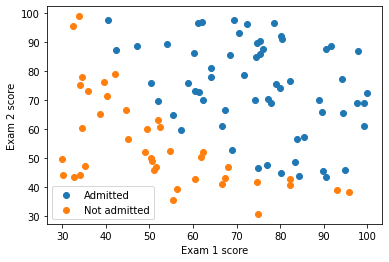

In [4]:
mask = y == 1
adm = plt.scatter(x[mask][0].values, x[mask][1].values)
not_adm = plt.scatter(x[~mask][0].values, x[~mask][1].values)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()

In [5]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

In [6]:
def costFunction(theta,x, y):
    J = (-1/m) * np.sum(np.multiply(y, np.log(sigmoid(x @ theta))) 
        + np.multiply((1-y), np.log(1 - sigmoid(x @ theta))))
    return J



def gradientDescent(theta,x, y):
    return ((1/m) * x.T @ (sigmoid(x @ theta) - y))

In [7]:
x.shape

(100, 2)

In [8]:
(m, n) = x.shape
ones = np.ones((m, 1))
x = np.hstack((ones, x))
theta = np.zeros((n+1, 1))
y = y[:, np.newaxis]


In [9]:
J = costFunction(theta,x, y)
J

0.6931471805599453

In [10]:
temp = opt.fmin_tnc(func = costFunction, 
                    x0 = theta.flatten(),fprime = gradientDescent, 
                    args = (x, y.flatten()))

temp

(array([-25.16131855,   0.20623159,   0.20147149]), 36, 0)

In [11]:
theta_optimised = temp[0]
theta_optimised

array([-25.16131855,   0.20623159,   0.20147149])

In [12]:
J = costFunction(theta_optimised[:,np.newaxis],x, y)
J

0.20349770158947486

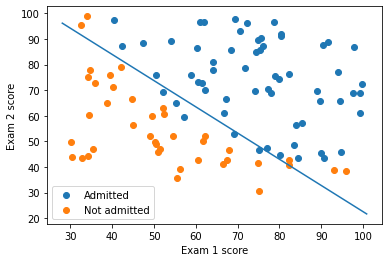

In [13]:
mask = y ==1
plot_x = [np.min(x[:,1]-2), np.max(x[:,2]+2)]
plot_y = -1/theta_optimised[2]*(theta_optimised[0] 
          + np.dot(theta_optimised[1],plot_x))  
mask = y.flatten() == 1
adm = plt.scatter(x[mask][:,1], x[mask][:,2])
not_adm = plt.scatter(x[~mask][:,1], x[~mask][:,2])
decision_boun = plt.plot(plot_x, plot_y)
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')
plt.legend((adm, not_adm), ('Admitted', 'Not admitted'))
plt.show()